Vehicle Value
500.0      282146
50000.0     18426
4197.0         25
7752.0         24
17154.0        24
Name: count, dtype: int64


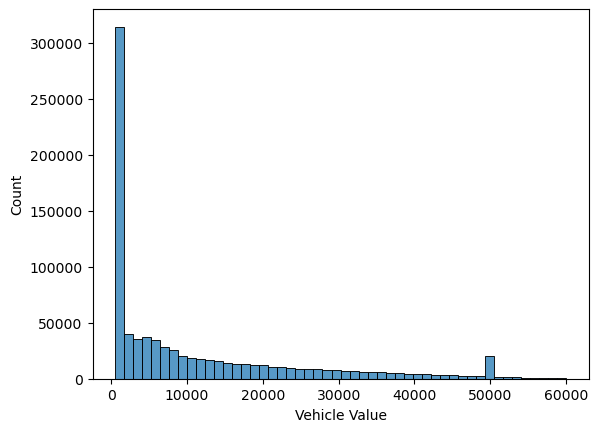

       HH_ID    CUST_ID  CAR_ID  Active HH HH Start Date    Phone Number  \
0  219790301  801198110  844435          1      11/18/22  (709) 379-9036   
1  219790301  801198110  844435          1      11/18/22  (709) 379-9036   
2  219790301  801198110  844435          1      11/18/22  (709) 379-9036   
3  219790301  281855167  410619          1      11/18/22  (740) 565-4060   
4  219790301  281855167  410619          1      11/18/22  (740) 565-4060   

    ZIP  State_x Country Referral Source  ... Vehicle Value  \
0  70442      OK     USA           Other  ...      50000.00   
1  70442      OK     USA           Other  ...        500.00   
2  70442      OK     USA           Other  ...        500.00   
3  70442      OK     USA           Other  ...       8151.75   
4  70442      OK     USA           Other  ...      13460.60   

  Annual Miles Driven Business Use Antique Vehicle  Lien  Lease  \
0                  56            0               1     1      0   
1               14800         

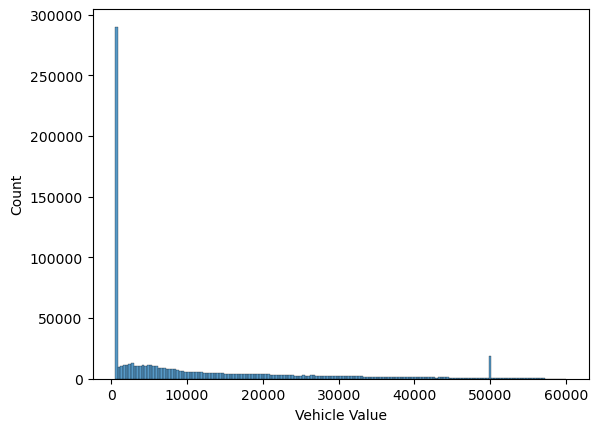

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load each CSV file into a DataFrame
cars_df = pd.read_csv('CARS.csv')
customers_df = pd.read_csv('CUSTOMERS.csv')
households_df = pd.read_csv('HOUSEHOLDS.csv')

# Merge households with customers on CUST_ID
households_customers_df = pd.merge(households_df, customers_df, on='CUST_ID', how='left')

# Merge the result with cars on CAR_ID
combined_df = pd.merge(households_customers_df, cars_df, left_on='CAR_ID', right_on='Car ID', how='left')

# Clean up: drop any columns that may have been duplicated during the merge
combined_df = combined_df.drop(columns=['Car ID'])

# Remove any rows or columns that are completely NaN (optional)
combined_df = combined_df.dropna(how='all')

# Reset index after merge and clean up
combined_df = combined_df.reset_index(drop=True)

# Identify the values causing the spike
value_counts = combined_df['Vehicle Value'].value_counts()
print(value_counts.head())

# Optionally, filter out rows with this common value
# Assuming the spike is caused by a high frequency of '0' value, filter out such rows
filtered_df = combined_df[combined_df['Vehicle Value'] > 0]

# Re-plot the distribution of the filtered dataset
sns.histplot(filtered_df['Vehicle Value'], bins=50)
plt.show()

# Save the filtered combined DataFrame to a new CSV file
filtered_df.to_csv('filtered_combined_dataset.csv', index=False)

# Display the first few rows of the filtered DataFrame
print(filtered_df.head())


print(combined_df.describe())
print(combined_df.info())
print(combined_df.head())

# Plot the distribution of a numeric feature
sns.histplot(combined_df['Vehicle Value'])
plt.show()

